# 5장 우리나라 인구 소멸 위기 지역 분석

### 작성 : [PinkWink](http://pinkwink.kr) 

> ### 인구 소멸 위기 지역:

> ‘한국의 ‘지방소멸’에 관한 7가지 분석’ 보고서를 쓴 이상호 한국고용정보원 부연구위원의 분석 방법을 이용. 
> 65세 이상 노인 인구와 20∼39세 여성 인구를 비교해 **젊은 여성 인구가 노인 인구의 절반에 미달할 경우 ‘소멸 위험 지역’으로 분류**하는 방식이다. 

## 5-2. 인구 데이터 확보하고 정리하기

In [41]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

### 데이터 불러오기

In [42]:
population = pd.read_excel('./data/05. population_raw_data.xlsx')
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,2016.9,2016.10,2016.11,2016.12
0,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,전국,소계,총인구수 (명),51696216,3541061,3217367,3517868,4016272,2237345,1781229,1457890,909130,416164,141488,34844,17562
2,NaN,NaN,남자인구수 (명),25827594,1877127,1682988,1806754,2045265,1072395,806680,600607,319391,113221,32695,7658,4137
3,NaN,NaN,여자인구수 (명),25868622,1663934,1534379,1711114,1971007,1164950,974549,857283,589739,302943,108793,27186,13425
4,서울특별시,소계,총인구수 (명),9930616,690728,751973,803507,817467,448956,350580,251961,141649,66067,24153,7058,5475


 - header 두 번째 행
 - Nan 값 처리

In [43]:
population = pd.read_excel('./data/05. population_raw_data.xlsx', header = 1)
population.head()

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


## 참고) Nan 데이터 처리하기 --> fillna()

### pandas fillna(method)


DataFrame.fillna(value, 
                method = {'backfill','bfill','pad','ffill',None},
                axis = {0,1},
                inplace = {True, False},
                limit = int, None, 
                downcast = dict, None)


In [44]:
# fillna 테스트
test = [
    [None,170,90,30,1],
    ['홍길동',None,60,None,0],
    ['김김김',None,None,5,0],
    ['나나나',130,20,10,0],
    ['다다다',None,None,None,None],
    ['신',200,150,999,9],
    ['래퍼',180,71,28,None],
    ['차',300,None,None,9]
]
data = pd.DataFrame(test)
data.head(10)

,0,1,2,3,4
0,None,170.0,90.0,30.0,1.0
1,홍길동,NaN,60.0,NaN,0.0
2,김김김,NaN,NaN,5.0,0.0
3,나나나,130.0,20.0,10.0,0.0
4,다다다,NaN,NaN,NaN,NaN
5,신,200.0,150.0,999.0,9.0
6,래퍼,180.0,71.0,28.0,NaN
7,차,300.0,NaN,NaN,9.0


In [45]:
# fillna(값) ==> 모든 Nan 값을 변환함
data.fillna(0).head(10)

,0,1,2,3,4
0,0,170.0,90.0,30.0,1.0
1,홍길동,0.0,60.0,0.0,0.0
2,김김김,0.0,0.0,5.0,0.0
3,나나나,130.0,20.0,10.0,0.0
4,다다다,0.0,0.0,0.0,0.0
5,신,200.0,150.0,999.0,9.0
6,래퍼,180.0,71.0,28.0,0.0
7,차,300.0,0.0,0.0,9.0


In [46]:
# fillna(method = ) 앞 / 뒤 데이터 참조하여 Nan 값을 넣어줌
#method = {'backfill','bfill','pad','ffill',None},
data.fillna(method ='pad').head(10)  
# data.fillna(method ='ffill').head(10)  
# method = 'pad','ffill' : 위에서부터 시작. 바로 위의 nonnull 값을 가져감

,0,1,2,3,4
0,None,170.0,90.0,30.0,1.0
1,홍길동,170.0,60.0,30.0,0.0
2,김김김,170.0,60.0,5.0,0.0
3,나나나,130.0,20.0,10.0,0.0
4,다다다,130.0,20.0,10.0,0.0
5,신,200.0,150.0,999.0,9.0
6,래퍼,180.0,71.0,28.0,9.0
7,차,300.0,71.0,28.0,9.0


In [47]:
#method = {'backfill','bfill','pad','ffill',None}
data.fillna(method ='bfill').head(10)  
# data.fillna(method ='backfill').head(10)  
# method = 'backfill' 'bfill' : 아래에서부터 시작. 바로 아래의 nonnull 값을 가져감

,0,1,2,3,4
0,홍길동,170.0,90.0,30.0,1.0
1,홍길동,130.0,60.0,5.0,0.0
2,김김김,130.0,20.0,5.0,0.0
3,나나나,130.0,20.0,10.0,0.0
4,다다다,200.0,150.0,999.0,9.0
5,신,200.0,150.0,999.0,9.0
6,래퍼,180.0,71.0,28.0,9.0
7,차,300.0,NaN,NaN,9.0


In [48]:
data.head()

,0,1,2,3,4
0,None,170.0,90.0,30.0,1.0
1,홍길동,NaN,60.0,NaN,0.0
2,김김김,NaN,NaN,5.0,0.0
3,나나나,130.0,20.0,10.0,0.0
4,다다다,NaN,NaN,NaN,NaN


 -  Nan 데이터 --> 바로 위의 데이터로 가져오기

In [49]:
population = pd.read_excel('./data/05. population_raw_data.xlsx', header=1)
population.fillna(method='pad', inplace=True) 

# 이름 바꾸기
population.rename(columns = {'행정구역(동읍면)별(1)':'광역시도', 
                             '행정구역(동읍면)별(2)':'시도', 
                             '계':'인구수'}, inplace=True)
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,전국,소계,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,전국,소계,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,서울특별시,소계,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0


In [50]:
# 데이터 살펴보기
population.시도.value_counts()

소계      54
중구      18
남구      18
동구      18
서구      15
북구      15
강서구      6
고성군      6
고령군      3
팔달구      3
옥천군      3
여수시      3
진도군      3
해남군      3
당진시      3
포천시      3
의창구      3
임실군      3
수원시      3
철원군      3
청주시      3
경산시      3
산청군      3
제천시      3
천안시      3
동남구      3
무주군      3
의성군      3
장흥군      3
의정부시     3
        ..
진해구      3
단원구      3
정선군      3
연제구      3
동두천시     3
창원시      3
금산군      3
의왕시      3
영등포구     3
권선구      3
나주시      3
화성시      3
정읍시      3
김제시      3
장수군      3
서천군      3
신안군      3
장안구      3
양산시      3
서귀포시     3
밀양시      3
함양군      3
예산군      3
동안구      3
청원구      3
충주시      3
구로구      3
강화군      3
광명시      3
청도군      3
Name: 시도, Length: 240, dtype: int64

In [51]:
# 시도 에서 '소계' 를 제외함
population = population[population.시도 != '소계']
population.head()

,광역시도,시도,항목,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


In [52]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 6 to 845
Data columns (total 16 columns):
광역시도        792 non-null object
시도          792 non-null object
항목          792 non-null object
인구수         792 non-null float64
20 - 24세    792 non-null float64
25 - 29세    792 non-null float64
30 - 34세    792 non-null int64
35 - 39세    792 non-null float64
65 - 69세    792 non-null float64
70 - 74세    792 non-null float64
75 - 79세    792 non-null int64
80 - 84세    792 non-null float64
85 - 89세    792 non-null float64
90 - 94세    792 non-null float64
95 - 99세    792 non-null int64
100+        792 non-null float64
dtypes: float64(10), int64(3), object(3)
memory usage: 105.2+ KB


* 위 표를 보면 **항목**이라는 컬럼의 내용이 각 행정구역 마다 **총인구수, 남자인구수, 여자인구수**로 나눠있는 것을 알 수 있음
* 이를 지금 정리하기 위해 간단히 반복문(for)으로 **합계, 남자, 여자**로 변경하고 **구분**이라는 컬럼으로 저장함
* 특히 이후 데이터 처리에서 copy 관련 warning을 피하기 위해 **.copy()**옵션으로 재지정함
* 그리고, **항목**을 지우기로 함

In [53]:
# # 교재내용

# population.is_copy = False   # ???? 

# population.rename(columns = {'항목':'구분'}, inplace=True)

# population.loc[population['구분'] == '총인구수 (명)', '구분'] = '합계'
# population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'
# population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'

# population

In [54]:
# 함수로 변경하기

def clff(x):
    if x == '총인구수 (명)' : return '합계'
    elif x == '남자인구수 (명)' : return '남자'
    elif x == '여자인구수 (명)' : return '여자'

population['항목'] = population.항목.apply(clff)
population.rename(columns = {'항목':'구분'}, inplace=True)

In [55]:
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0


## 5-3. 인구 소멸 위기 지역 계산하고 데이터 정리하기

 - 20대~30대 여자 Vs 65세 이상

In [ ]:
# 교재
# population['20-39세'] = population['20 - 24세'] + population['25 - 29세'] + \
#                         population['30 - 34세'] + population['35 - 39세']
    
# population['65세이상'] = population['65 - 69세'] + population['70 - 74세'] + \
#                         population['75 - 79세'] + population['80 - 84세'] + \
#                         population['85 - 89세'] + population['90 - 94세'] + \
#                         population['95 - 99세'] + population['100+']
            
# population.head(10)

In [ ]:
# sum() 활용

In [56]:
c = list(population.columns)[4:8]
print(c)
population[c].head()

['20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세']


,20 - 24세,25 - 29세,30 - 34세,35 - 39세
6,11379.0,11891.0,10684,10379.0
7,5620.0,6181.0,5387,5034.0
8,5759.0,5710.0,5297,5345.0
9,8216.0,9529.0,10332,10107.0
10,4142.0,4792.0,5192,5221.0


In [57]:
# sum() 활용!

c = list(population.columns)[4:8]
print(c)
# population[c].sum(axis=1)
# population[c[0]]

population['20-39세'] = population[c].sum(axis=1)
# population['20-39세'] = population[c[0]] + population[c[1]] + population[c[2]] + population[c[3]]

population.head()


,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0


In [58]:
o = list(population.columns)[8:-1]
print(o)
population['65세이상'] = population[o].sum(axis=1)
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20-39세,65세이상
6,서울특별시,종로구,합계,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0,44333.0,24950.0
7,서울특별시,종로구,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0,22222.0,10895.0
8,서울특별시,종로구,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0,22111.0,14055.0
9,서울특별시,중구,합계,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0,38184.0,20388.0
10,서울특별시,중구,남자,62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0,19347.0,8852.0


* **pivot_table**을 이용하여 **광역시도, 시도**를 index로 두고, **구분**으로 세로를 첫 번째 컬럼을 잡고, value에 **인구수, 20~39세, 65세이상**으로 정리해 둔다.

In [59]:
pop = pd.pivot_table(population, index = ['광역시도','시도'], columns =['구분'],
                     values=['인구수','20-39세','65세이상'])
pop

20-39세                        65세이상                          인구수  \
구분               남자        여자        합계       남자       여자        합계        남자   
광역시도 시도                                                                         
강원도  강릉시    26286.0   23098.0   49384.0  15767.0  21912.0   37679.0  106231.0   
     고성군     4494.0    2529.0    7023.0   2900.0   4251.0    7151.0   15899.0   
     동해시    11511.0    9753.0   21264.0   6392.0   8732.0   15124.0   47166.0   
     삼척시     8708.0    7115.0   15823.0   5892.0   8718.0   14610.0   35253.0   
     속초시     9956.0    8752.0   18708.0   5139.0   7613.0   12752.0   40288.0   
     양구군     4368.0    2481.0    6849.0   1650.0   2458.0    4108.0   12918.0   
     양양군     2916.0    2171.0    5087.0   2988.0   3993.0    6981.0   13838.0   
     영월군     4025.0    3134.0    7159.0   4215.0   5700.0    9915.0   20652.0   
     원주시    45755.0   43164.0   88919.0  17384.0  24862.0   42246.0  167854.0   
     인제군     5512.0    3449.0    8961.0   2413.0   3189.0    5602.0   17677.0   
     정선군     4138.0    3297.0    7435.0   3831.0   5177.0    9008.0   19975.0   
     철원군     7918.0    4714.0   12632.0   3804.0   5308.0    9112.0   25429.0   
     춘천시    37173.0   35422.0   72595.0  17259.0  24440.0   41699.0  138251.0   
     태백시     5333.0    4643.0    9976.0   3978.0   5288.0    9266.0   23899.0   
     평창군     4377.0    3585.0    7962.0   4223.0   5614.0    9837.0   22126.0   
     홍천군     7900.0    6258.0   14158.0   6450.0   8483.0   14933.0   35738.0   
     화천군     5397.0    2643.0    8040.0   1991.0   2815.0    4806.0   14554.0   
     횡성군     4512.0    3789.0    8301.0   4941.0   6382.0   11323.0   23398.0   
경기도  가평군     7024.0    5771.0   12795.0   5960.0   7609.0   13569.0   31981.0   
     고양시   143723.0  145020.0  288743.0  46866.0  67226.0  114092.0  510923.0   
     과천시     8582.0    8315.0   16897.0   3117.0   4618.0    7735.0   31013.0   
     광명시    49509.0   47807.0   97316.0  15468.0  21081.0   36549.0  168241.0   
     광주시    49690.0   45073.0   94763.0  16061.0  19142.0   35203.0  168345.0   
     구리시    27732.0   26941.0   54673.0   8903.0  11720.0   20623.0   96397.0   
     군포시    43183.0   41049.0   84232.0  12126.0  16404.0   28530.0  141647.0   
     권선구    60291.0   56279.0  116570.0  13234.0  17690.0   30924.0  180766.0   
     기흥구    56866.0   58658.0  115524.0  18831.0  24001.0   42832.0  206316.0   
     김포시    49921.0   49660.0   99581.0  17847.0  22658.0   40505.0  182597.0   
     남양주시   87416.0   86835.0  174251.0  33150.0  42836.0   75986.0  330749.0   
     단원구    49620.0   43619.0   93239.0  10430.0  14100.0   24530.0  161915.0   
...             ...       ...       ...      ...      ...       ...       ...   
충청남도 금산군     5448.0    4454.0    9902.0   6012.0   8594.0   14606.0   27558.0   
     논산시    14111.0   11900.0   26011.0  11593.0  16464.0   28057.0   61724.0   
     당진시    24970.0   19356.0   44326.0  11765.0  15680.0   27445.0   87388.0   
     동남구    38023.0   35222.0   73245.0  12858.0  17329.0   30187.0  131135.0   
     보령시    12314.0    9590.0   21904.0   9579.0  13389.0   22968.0   52521.0   
     부여군     6822.0    5348.0   12170.0   8575.0  12197.0   20772.0   34837.0   
     서북구    63523.0   57966.0  121489.0  11150.0  15664.0   26814.0  182987.0   
     서산시    23700.0   19196.0   42896.0  11840.0  16190.0   28030.0   87770.0   
     서천군     5219.0    4142.0    9361.0   7221.0  10363.0   17584.0   27539.0   
     아산시    47643.0   42296.0   89939.0  14581.0  20486.0   35067.0  155692.0   
     예산군     8450.0    6665.0   15115.0   9230.0  12776.0   22006.0   40827.0   
     천안시   101546.0   93188.0  194734.0  24008.0  32993.0   57001.0  314122.0   
     청양군     3207.0    2410.0    5617.0   4300.0   6029.0   10329.0   16389.0   
     태안군     6956.0    5271.0   12227.0   7241.0   9627.0   16868.0   32260.0   
     홍성군    11691.0   10428.0   22119.0   8889.0  12426.0   21315.0   49769.0   
충청북도 괴산군     3606.0    2726.0    6332.0   48

* **소멸비율**이라는 컬럼에 인구소멸위기지역을 계산하기 위한 식을 적용한다
* 이 비율이 1보다 작으면 **인구소멸위기지역**으로 볼 수 있다.

In [60]:
pop['소멸비율'] = pop['20-39세','여자'] / (pop['65세이상','합계'] / 2)
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율  
구분              여자        합계            
광역시도 시도                                 
강원도  강릉시  107615.0  213846.0  1.226041  
     고성군   14215.0   30114.0  0.707314  
     동해시   46131.0   93297.0  1.289738  
     삼척시   34346.0   69599.0  0.973990  
     속초시   41505.0   81793.0  1.372647

* 소멸위기지역인지를 boolean으로 지정해 둔다

In [61]:
pop['소멸위기지역'] = pop['소멸비율'] < 1.0
pop.head()

20-39세                      65세이상                         인구수  \
구분             남자       여자       합계       남자       여자       합계        남자   
광역시도 시도                                                                    
강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
     고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
     동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
     삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
     속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                                  소멸비율 소멸위기지역  
구분              여자        합계                   
광역시도 시도                                        
강원도  강릉시  107615.0  213846.0  1.226041  False  
     고성군   14215.0   30114.0  0.707314   True  
     동해시   46131.0   93297.0  1.289738  False  
     삼척시   34346.0   69599.0  0.973990   True  
     속초시   41505.0   81793.0  1.372647  False

In [64]:
# pop[pop['소멸위기지역']==True].index
pop[pop.소멸위기지역].index.get_level_values(1)
# pop[pop.소멸위기지역].index.get_level_values(0)   # 강원도, 강원도, .....


Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

* pivot_table로 잘 정리가 된 상태에서 **.reset_index**로 pivot_table의 result 속성을 다시 설정한다.

In [69]:
pop.reset_index().head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

In [70]:
pop.reset_index().columns

MultiIndex(levels=[['20-39세', '65세이상', '인구수', '소멸비율', '소멸위기지역', '시도', '광역시도'], ['남자', '여자', '합계', '']],
           labels=[[6, 5, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 4], [3, 3, 0, 1, 2, 0, 1, 2, 0, 1, 2, 3, 3]],
           names=[None, '구분'])

In [71]:
pop.reset_index(inplace=True) 
pop.head()

광역시도   시도   20-39세                      65세이상                         인구수  \
구분                 남자       여자       합계       남자       여자       합계        남자   
0   강원도  강릉시  26286.0  23098.0  49384.0  15767.0  21912.0  37679.0  106231.0   
1   강원도  고성군   4494.0   2529.0   7023.0   2900.0   4251.0   7151.0   15899.0   
2   강원도  동해시  11511.0   9753.0  21264.0   6392.0   8732.0  15124.0   47166.0   
3   강원도  삼척시   8708.0   7115.0  15823.0   5892.0   8718.0  14610.0   35253.0   
4   강원도  속초시   9956.0   8752.0  18708.0   5139.0   7613.0  12752.0   40288.0   

                            소멸비율 소멸위기지역  
구분        여자        합계                   
0   107615.0  213846.0  1.226041  False  
1    14215.0   30114.0  0.707314   True  
2    46131.0   93297.0  1.289738  False  
3    34346.0   69599.0  0.973990   True  
4    41505.0   81793.0  1.372647  False

* 이중 column을 해제하기 위해 두 컬럼 제목을 합쳐 다시 지정한다.

In [72]:
# pop.columns
# len(pop.columns)
pop.columns.get_level_values(0)  # ['광역시도', '시도', '20-39세', '20-39세', '20-39세', '65세이상', '65세이상', '65세이상', 
                                 # '인구수', '인구수', '인구수', '소멸비율', '소멸위기지역']

# pop.columns.get_level_values(1) #['', '', '남자', '여자', '합계', '남자', '여자', '합계', '남자', '여자', '합계', '', '']


Index(['', '', '남자', '여자', '합계', '남자', '여자', '합계', '남자', '여자', '합계', '', ''], dtype='object', name='구분')

In [ ]:
# 교재내용
# tmp_coloumns = [pop.columns.get_level_values(0)[n] + \
#                 pop.columns.get_level_values(1)[n] 
#                 for n in range(0,len(pop.columns.get_level_values(0)))]

# pop.columns = tmp_coloumns

# pop.head()

In [73]:
# zip(A,B) 를 활용
tmp_columns = []
for level1, level2 in zip(pop.columns.get_level_values(0), pop.columns.get_level_values(1)):
#     print(level1 + level2)
    tmp_columns.append(level1 + level2)

print(tmp_columns)

pop.columns = tmp_columns  #columns 명 변경하기
pop.head()

['광역시도', '시도', '20-39세남자', '20-39세여자', '20-39세합계', '65세이상남자', '65세이상여자', '65세이상합계', '인구수남자', '인구수여자', '인구수합계', '소멸비율', '소멸위기지역']


,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False


In [74]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 13 columns):
광역시도        264 non-null object
시도          264 non-null object
20-39세남자    264 non-null float64
20-39세여자    264 non-null float64
20-39세합계    264 non-null float64
65세이상남자     264 non-null float64
65세이상여자     264 non-null float64
65세이상합계     264 non-null float64
인구수남자       264 non-null float64
인구수여자       264 non-null float64
인구수합계       264 non-null float64
소멸비율        264 non-null float64
소멸위기지역      264 non-null bool
dtypes: bool(1), float64(10), object(2)
memory usage: 25.1+ KB


## 5-5. 지도 시각화를 위해 지역별 고유 ID 만들기

In [75]:
pop['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [77]:
# [None] * len(pop)
[None] * 5

[None, None, None, None, None]

In [78]:
pop[pop.시도=='장안구']

,광역시도,시도,20-39세남자,20-39세여자,20-39세합계,65세이상남자,65세이상여자,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역
60,경기도,장안구,45738.0,41481.0,87219.0,12574.0,17542.0,30116.0,148987.0,147492.0,296479.0,2.754748,False


In [ ]:
# Q) 수원: 장안구, 권선구, 팔달구, 영통구....  지역 확인 How?

In [79]:
si_name = [None] * len(pop)   #[None, None, .....None]

tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [80]:
pop.index

RangeIndex(start=0, stop=264, step=1)

In [83]:
# 광역시도 + 시도 --> 하나의 ID 로 변경하기

for n in pop.index:
    
    # 광역시', '특별시', '자치시' 가 아닐 경우  
    if pop['광역시도'][n][-3:] not in ['광역시', '특별시', '자치시']:
        
        # 고성 --> 강원/경남 구분
        if pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif pop['시도'][n][:-1]=='고성' and pop['광역시도'][n]=='경상남도':
            si_name[n] = '고성(경남)'
            
        else:  si_name[n] = pop['시도'][n][:-1]
            
        for keys, values in tmp_gu_dict:        
            if pop['시도'][n] in values:
                if len(pop['시도'][n])==2:
                    si_name[n] = keys + ' ' + pop['시도'][n]
                elif pop['시도'][n] in ['마산합포구','마산회원구']:
                    si_name[n] = keys + ' ' + pop['시도'][n][2:-1]
                else:
                    si_name[n] = keys + ' ' + pop['시도'][n][:-1]

    # 광역시도 구분자 '광역시', '특별시', '자치시' 일 경우
    elif pop['광역시도'][n] == '세종특별자치시':
        si_name[n] = '세종'
        
    else:
        if len(pop['시도'][n])==2:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n]
        else:
            si_name[n] = pop['광역시도'][n][:2] + ' ' + pop['시도'][n][:-1]

In [84]:
si_name

['강릉',
 '고성(강원)',
 '동해',
 '삼척',
 '속초',
 '양구',
 '양양',
 '영월',
 '원주',
 '인제',
 '정선',
 '철원',
 '춘천',
 '태백',
 '평창',
 '홍천',
 '화천',
 '횡성',
 '가평',
 '고양',
 '과천',
 '광명',
 '광주',
 '구리',
 '군포',
 '권선',
 '기흥',
 '김포',
 '남양주',
 '단원',
 '덕양',
 '동두천',
 '동안',
 '만안',
 '부천',
 '분당',
 '상록',
 '성남',
 '소사',
 '수원',
 '수정',
 '수지',
 '시흥',
 '안산',
 '안성',
 '안양',
 '양주',
 '양평',
 '여주',
 '연천',
 '영통',
 '오산',
 '오정',
 '용인',
 '원미',
 '의왕',
 '의정부',
 '이천',
 '일산동',
 '일산서',
 '장안',
 '중원',
 '처인',
 '파주',
 '팔달',
 '평택',
 '포천',
 '하남',
 '화성',
 '거제',
 '거창',
 '고성(경남)',
 '김해',
 '남해',
 '마산합포',
 '마산회원',
 '밀양',
 '사천',
 '산청',
 '성산',
 '양산',
 '의령',
 '의창',
 '진주',
 '진해',
 '창녕',
 '창원',
 '통영',
 '하동',
 '함안',
 '함양',
 '합천',
 '경산',
 '경주',
 '고령',
 '구미',
 '군위',
 '김천',
 '남',
 '문경',
 '봉화',
 '북',
 '상주',
 '성주',
 '안동',
 '영덕',
 '영양',
 '영주',
 '영천',
 '예천',
 '울릉',
 '울진',
 '의성',
 '청도',
 '청송',
 '칠곡',
 '포항',
 '광주 광산',
 '광주 남구',
 '광주 동구',
 '광주 북구',
 '광주 서구',
 '대구 남구',
 '대구 달서',
 '대구 달성',
 '대구 동구',
 '대구 북구',
 '대구 서구',
 '대구 수성',
 '대구 중구',
 '대전 대덕',
 '대전 동구',
 '대전 서구',
 '대전 유

* 지도 시각화에 사용하기 위해 위 과정에서 만들어진 행정구역의 고유한 이름을 ID로 지정한다

In [85]:
pop['ID'] = si_name

In [86]:
del pop['20-39세남자']
del pop['65세이상남자']
del pop['65세이상여자']

pop.head()

,광역시도,시도,20-39세여자,20-39세합계,65세이상합계,인구수남자,인구수여자,인구수합계,소멸비율,소멸위기지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초


## 5-6. Cartogram으로 우리나라 지도 만들기

In [87]:
draw_korea_raw = pd.read_excel('./data/05. draw_korea_raw.xlsx', 
                               encoding="EUC-KR")
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


* 이제 각 행정 구역의 화면상 좌표를 얻기 위해 pivot_table의 반대 개념으로 **.stack()** 명령을 사용한다.

In [96]:
draw_korea_raw.head()
# draw_korea_raw.columns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN


In [98]:
draw_korea_raw.stack().head(10)
# type(draw_korea_raw.stack())  # pandas.core.series.Series

0  7         철원
   8         화천
   9         양구
   10    고성(강원)
1  3         양주
   4        동두천
   5         연천
   6         포천
   7        의정부
   8         인제
dtype: object

In [89]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())   #Series type --> DataFrame type
draw_korea_raw_stacked.head()

0
0 7       철원
  8       화천
  9       양구
  10  고성(강원)
1 3       양주

In [100]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x', 0:'ID'}, 
                              inplace=True)

draw_korea_raw_stacked.head(10)

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [101]:
draw_korea = draw_korea_raw_stacked

* 먼저 ID 컬럼에서 지도에 표기할때 시 이름 구 이름으로 줄을 나누기 위해 분리한다

In [102]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

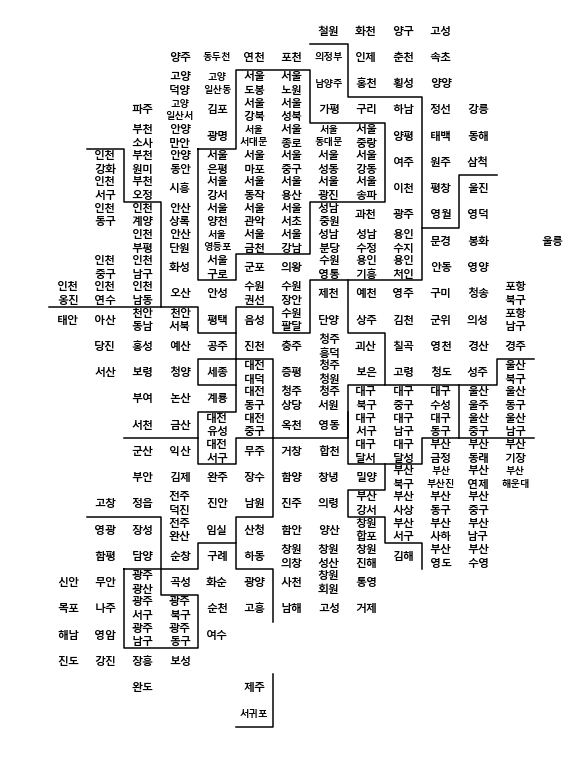

In [112]:
plt.figure(figsize=(8, 11))

# 지역 이름 표시
for idx, row in draw_korea.iterrows():   #Q) iterrows()?
    
    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
    # (중구, 서구)
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    # plt.annotate()????
    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

    
# Q) .gca()
plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

* 인구에 대한 분석 결과인 pop과 지도를 그리기 위한 draw_korea의 대이터를 합칠 때 사용할 key인 ID 컬럼의 내용이 문제가 없는지 확인하자

In [ ]:
set(draw_korea['ID'].unique()) - set(pop['ID'].unique())

In [ ]:
set(pop['ID'].unique()) - set(draw_korea['ID'].unique())

* 위 결과에 따르면, pop에 행정구를 가진 시들의 데이터가 더 있다는 것을 알 수 있다.
* 어차피 지도에서는 표시되지 못하니 삭제한다.

In [ ]:
tmp_list = list(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

for tmp in tmp_list:
    pop = pop.drop(pop[pop['ID']==tmp].index)
                       
print(set(pop['ID'].unique()) - set(draw_korea['ID'].unique()))

In [ ]:
pop.head()

* 이제 pop과 draw_korea의 ID 컬럼이 일치했다고 보고, ID를 key로 merge를 시키도록 한다.

In [ ]:
pop = pd.merge(pop, draw_korea, how='left', on=['ID'])

pop.head()

* 이제 위 pop 데이터에서 지도에 표현하고자 하는 데이터가 **인구수합계**라면 이 값들이 아까 만든 각 해당 행정구역에 위치하면 된다.

In [ ]:
mapdata = pop.pivot_table(index='y', columns='x', values='인구수합계')
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

In [ ]:
mapdata

In [ ]:
masked_mapdata

* 위 내용과 colormap을 완성하는 명령을 추가해서 함수로 만들자

In [ ]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = (max(blockedMap[targetData]) - 
                                     min(blockedMap[targetData]))*0.25 + \
                                                                min(blockedMap[targetData])

    datalabel = targetData

    vmin = min(blockedMap[targetData])
    vmax = max(blockedMap[targetData])

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

## 5-7 인구 현황 및 인구 소멸 지역 확인하기

In [ ]:
drawKorea('인구수합계', pop, 'Blues')

* 인구 소멸 위기 지역에 대한 표현

In [ ]:
pop['소멸위기지역'] = [1 if con else 0 for con in pop['소멸위기지역']]
drawKorea('소멸위기지역', pop, 'Reds')

## 5-8. 인구 현황에서 여성 인구 비율 확인하기

In [ ]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([ np.abs(min(blockedMap[targetData])), 
                                  np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if np.abs(row[targetData]) > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

In [ ]:
pop.head()

In [ ]:
pop['여성비'] = (pop['인구수여자']/pop['인구수합계'] - 0.5)*100
drawKorea('여성비', pop, 'RdBu')

In [ ]:
pop['2030여성비'] = (pop['20-39세여자']/pop['20-39세합계'] - 0.5)*100
drawKorea('2030여성비', pop, 'RdBu')

## 5-9. Folium에서 인구 소멸 위기 지역 표현하기

In [ ]:
pop_folium = pop.set_index('ID')
pop_folium.head()

In [ ]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['인구수합계'],
               columns = [pop_folium.index, pop_folium['인구수합계']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [ ]:
map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['소멸위기지역'],
               columns = [pop_folium.index, pop_folium['소멸위기지역']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

map

In [ ]:
draw_korea.to_csv("../data/05. draw_korea.csv", encoding='utf-8', sep=',')